In [79]:
# K-Means Clustering Example
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

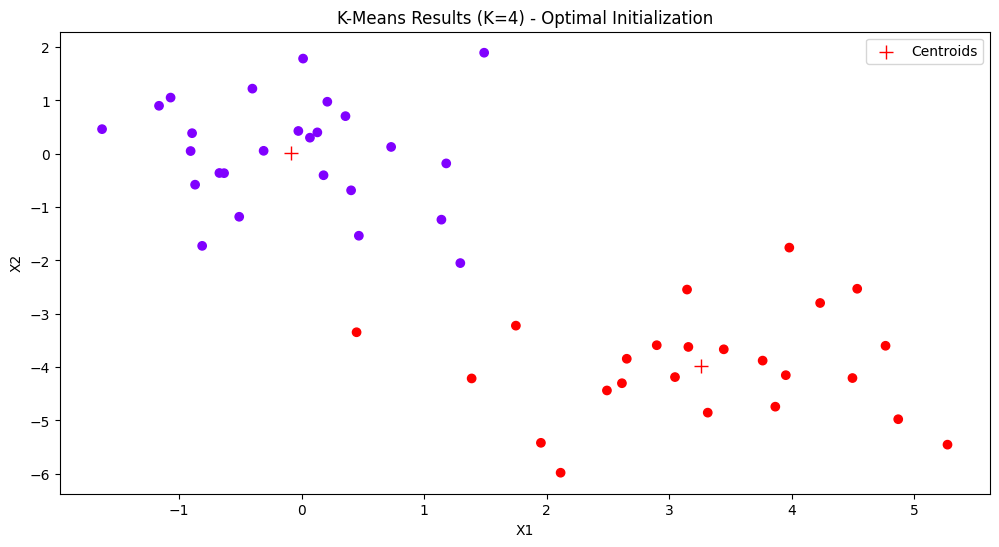

In [80]:
# 5. Visualize the best clustering result (n_init=20)
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans20.labels_, cmap=plt.cm.rainbow)
plt.title(f"K-Means Results (K={K}) - Optimal Initialization")
plt.scatter(kmeans20.cluster_centers_[:, 0],
            kmeans20.cluster_centers_[:, 1],
            marker='+', s=100, color='red', label='Centroids', linewidth=1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [81]:
# 4. Compare performance (within-cluster variation)
print(f"Within-Cluster Variation (K={K}, n_init=1): {kmeans1.inertia_:.2f}")
print(f"Within-Cluster Variation (K={K}, n_init=20): {kmeans20.inertia_:.2f}")

Within-Cluster Variation (K=4, n_init=1): 57.77
Within-Cluster Variation (K=4, n_init=20): 99.32


In [82]:
# 3. Perform K-Means clustering with K=4
K = 4

# Using n_init=1 to demonstrate a poor result (local optimum)
kmeans1 = KMeans(n_clusters=K, random_state=3, n_init=1).fit(X)

# Using n_init=20 (recommended) to ensure finding the best local optimum
k_means_20 = KMeans(n_clusters=K, random_state=3, n_init=20).fit(X)

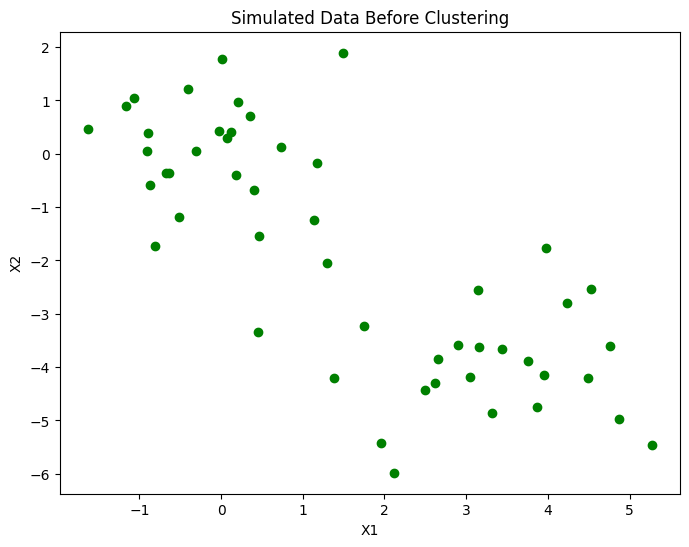

In [83]:
# 2. Visualize the data before clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='green')
plt.title("Simulated Data Before Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [84]:
# 1. Create simulated dataset
# Set seed for reproducibility
np.random.seed(0)

# Create 50 observations
X = np.random.standard_normal((50, 2))

# Shift first 25 observations to create a distinct cluster
X[:25, 0] += 3
X[:25, 1] -= 4

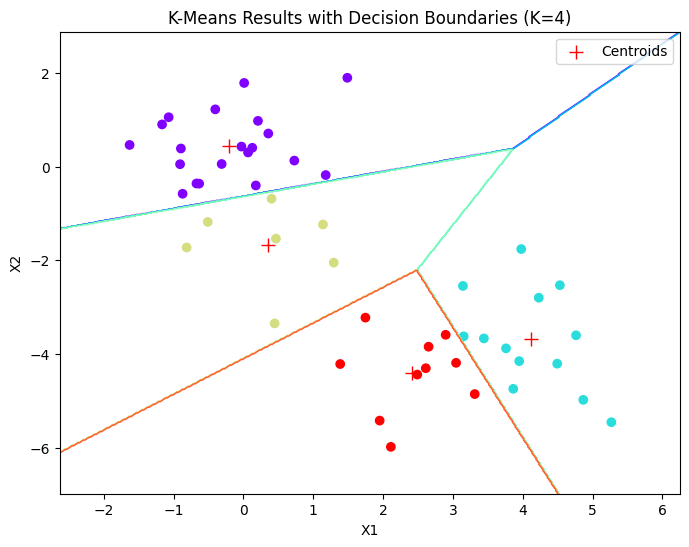

In [85]:
# 5. Visualize decision boundaries

# Create a meshgrid to plot the decision boundaries
h = .02 # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict cluster for each point in the meshgrid
Z = k_means_20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, cmap=plt.cm.rainbow, linewidths=1) # Changed to contour and added linewidths

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=k_means_20.labels_, cmap=plt.cm.rainbow)

# Plot the centroids
plt.scatter(k_means_20.cluster_centers_[:, 0],
            k_means_20.cluster_centers_[:, 1],
            marker='+', s=100, color='red', label='Centroids', linewidth=1) # Changed marker to '+', size to 100, and added linewidth

plt.title(f"K-Means Results with Decision Boundaries (K={K})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

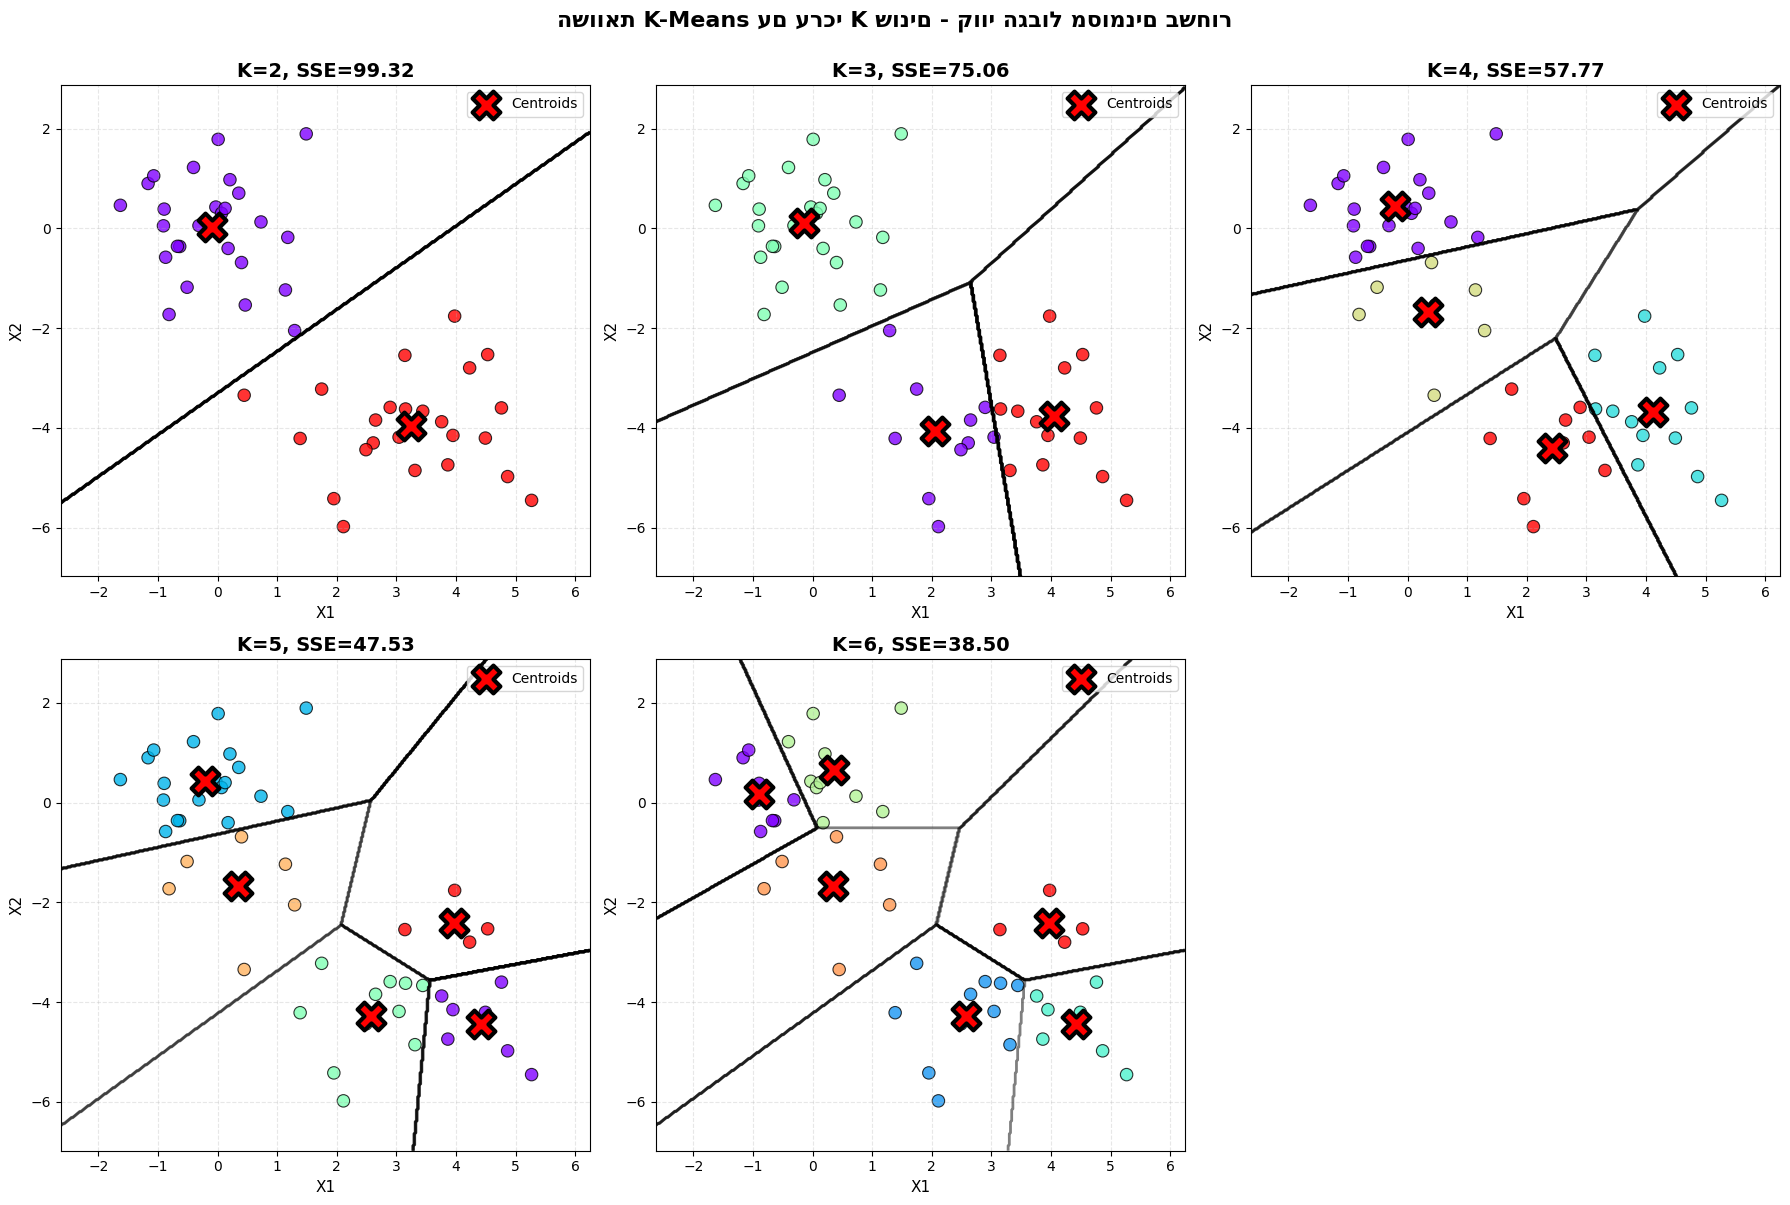

In [86]:
# 6. השוואת ערכי K שונים עם קווי גבול בין הקבוצות
k_values = [2, 3, 4, 5, 6]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=3, n_init=20).fit(X)
    
    # יצירת רשת לקווי הגבול
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # חיזוי עבור כל נקודה
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # שירטוט קווי גבול שחורים בין הקבוצות
    axes[idx].contour(xx, yy, Z, colors='black', linewidths=2, alpha=0.5)
    
    # שירטוט הנקודות
    scatter = axes[idx].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, 
                                cmap=plt.cm.rainbow, s=80, 
                                edgecolors='black', linewidth=0.8, alpha=0.8)
    
    # שירטוט המרכזים
    axes[idx].scatter(kmeans.cluster_centers_[:, 0],
                      kmeans.cluster_centers_[:, 1],
                      marker='X', s=400, c='red', 
                      edgecolors='black', linewidth=3, 
                      label='Centroids', zorder=5)
    
    axes[idx].set_title(f'K={k}, SSE={kmeans.inertia_:.2f}', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('X1', fontsize=11)
    axes[idx].set_ylabel('X2', fontsize=11)
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3, linestyle='--')

# הסתרת התא האחרון
axes[5].axis('off')

plt.suptitle('השוואת K-Means עם ערכי K שונים - קווי הגבול מסומנים בשחור', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()